In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [183]:
# MYCT = Machine Cycle Time in nanosec
# MMIN = Minimum Main Memory in kilobytes
# MMAX = Maximum Main Memory in kilobytes
# CACH = Caatche Memory in kilobytes
# CHMIN = Minimum Channels in units
# CHMAX = Maximum Channels in units
# PRP = Published Relative Performance
# ERP = Estimated Relative Performance

titles = ['vendor_name','model_name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

model = pd.read_csv('machine.csv', names=titles)

In [184]:
model.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [185]:
model.columns

Index(['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

In [186]:
model.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [187]:
model.shape

(209, 10)

In [188]:
vendor = model['vendor_name'].unique()

for i,vendor_name in enumerate(vendor):
#     print(i)
#     print(vendor)
    model.replace(vendor_name,i,inplace=True)

In [189]:
model.corr(method='pearson')

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
vendor_name,1.000000,-0.073559,-0.085147,0.013210,0.001391,0.031431,-0.009727,-0.023770,-0.019993
MYCT,-0.073559,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.085147,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,0.013210,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,0.001391,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,0.031431,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.009727,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.023770,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.019993,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


In [190]:
model.drop(['PRP','model_name'], axis=1, inplace=True)

In [191]:
model.columns

Index(['vendor_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'ERP'], dtype='object')

In [192]:
y = model['ERP']

In [193]:
y.shape

(209,)

In [194]:
x = model.drop('ERP', axis=1)

In [195]:
x.head()

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,0,125,256,6000,256,16,128
1,1,29,8000,32000,32,8,32
2,1,29,8000,32000,32,8,32
3,1,29,8000,32000,32,8,32
4,1,29,8000,16000,32,8,16


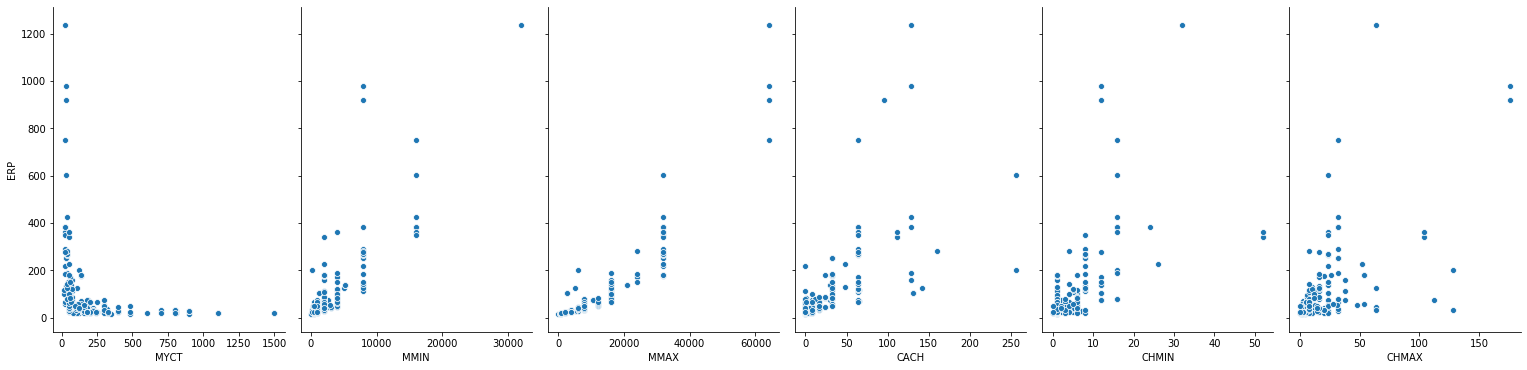

In [211]:
sns.pairplot(model, x_vars=['MYCT','MMIN','MMAX','CACH', 'CHMIN','CHMAX'], y_vars='ERP', height=5, aspect=0.7)

In [197]:
x = x.to_numpy()

In [198]:
y = y.to_numpy()

In [199]:
reg = LinearRegression()

In [200]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
#x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [202]:
#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [203]:
#reg.fit(x_train,y_train)

In [204]:
print(reg.intercept_)

-71.52530593625518


In [205]:
print(reg.coef_)

[ 0.30308322  0.06675387  0.01448586  0.0065501   0.49284836 -0.20568163
  1.21243689]


In [206]:
y_new = reg.predict(x)

In [207]:
y_new

array([ 2.57898112e+02,  3.09127443e+02,  3.09127443e+02,  3.09127443e+02,
        1.84926832e+02,  3.24698329e+02,  4.38739500e+02,  4.38739500e+02,
        6.48342743e+02,  9.47165884e+02, -7.86223288e+00, -4.83514125e+00,
        5.62906651e+01,  1.36995658e+02, -4.09587495e+01,  9.32314379e+01,
       -1.68645854e+01,  1.70613907e+01, -1.45074403e+01,  1.88447822e+02,
        4.02999161e+01,  4.82730404e+01,  8.98258935e+01,  9.92117042e+01,
        7.15279241e+00, -2.24255810e+01,  1.73236123e+00, -1.95838600e+01,
       -3.50403220e-01, -2.84634668e+00,  5.95963072e+01,  5.95963072e+01,
        8.19477440e+01,  8.19477440e+01,  1.89011785e+02,  1.89545816e+02,
       -3.71360439e+01, -1.55804739e+01,  2.51057921e+01, -1.56887540e+01,
        1.05116514e+01,  7.73983228e+01,  7.86107597e+01,  7.86107597e+01,
        5.15356181e+01,  2.53352128e+01,  9.93035917e-01,  3.35162039e+01,
        2.02091504e+01,  1.78073896e+01,  3.72033747e+01, -3.95142346e+00,
        7.14557535e+01,  

In [208]:
y

array([ 199,  253,  253,  253,  132,  290,  381,  381,  749, 1238,   23,
         24,   70,  117,   15,   64,   23,   29,   22,  124,   35,   39,
         40,   45,   28,   21,   28,   22,   28,   27,  102,  102,   74,
         74,  138,  136,   23,   29,   44,   30,   41,   74,   74,   74,
         54,   41,   18,   28,   36,   38,   34,   19,   72,   36,   30,
         56,   42,   34,   34,   34,   34,   34,   19,   75,  113,  157,
         18,   20,   28,   33,   47,   54,   20,   23,   25,   52,   27,
         50,   18,   53,   23,   30,   73,   20,   25,   28,   29,   32,
        175,   57,  181,  181,   32,   82,  171,  361,  350,  220,  113,
         15,   21,   35,   18,   20,   20,   28,   45,   18,   17,   26,
         28,   28,   31,   31,   42,   76,   76,   26,   59,   65,  101,
        116,   18,   20,   20,   30,   44,   44,   82,   82,  128,   37,
         46,   46,   80,   88,   88,   33,   46,   29,   53,   53,   41,
         86,   95,  107,  117,  119,  120,   48,  1

In [212]:
reg.score(x,y)

0.911077117161752